In [1]:
# --- Definitive Installation for PyTorch and Mamba in Colab/Kaggle ---
# This process ensures full compatibility between the libraries.

# 1. Completely uninstall existing versions to prevent conflicts.
# The '-y' flag automatically confirms the uninstall.
print("--- Step 1: Uninstalling existing torch and mamba libraries ---")
!pip uninstall -y torch torchvision torchaudio mamba-ssm causal-conv1d

# 2. Install a specific, known-good version of PyTorch compatible with Colab's CUDA drivers.
print("\n--- Step 2: Installing a compatible version of PyTorch ---")
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# 3. Re-install Mamba from source. This will now compile against the new PyTorch version.
print("\n--- Step 3: Compiling and installing Mamba from source ---")
!git clone https://github.com/state-spaces/mamba /content/mamba
%cd /content/mamba
!pip install .
%cd /content/
print("DONE!")

--- Step 1: Uninstalling existing torch and mamba libraries ---
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124

--- Step 2: Installing a compatible version of PyTorch ---
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.6 MB/s eta 0:00:00
     ━━━

In [2]:
!pip install mamba-ssm[causal-conv1d] --no-build-isolation
!pip install triton

  Preparing metadata (pyproject.toml) ... done
  Created wheel for causal-conv1d: filename=causal_conv1d-1.5.3.post1-cp311-cp311-linux_x86_64.whl size=151310979 sha256=b4ca912674e2357e1ac970aba5d8d9e8c712d2146889499276ee2a2d55a6def0
  Stored in directory: /root/.cache/pip/wheels/f0/d3/df/0b099cc9dde74b1a0b9491b60b1385b5c06e57d46922460d33
Successfully built causal-conv1d


In [3]:
!pip3 install -q -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.0/833.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import AutoTokenizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import numpy as np
import copy
import os
import pickle
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import datetime

# --- 0. Environment Check ---
try:
    from mamba_ssm import Mamba
    print("Mamba-SSM library detected successfully.")
except ImportError:
    print("CRITICAL ERROR: 'mamba_ssm' not found.")
    print("Please run the installation script provided earlier (git clone + pip install .).")

# --- 1. Configuration (Upscaled for ~35M Parameters) ---
NUM_CLIENTS = 5
ROUNDS = 5
LOCAL_EPOCHS = 2
BATCH_SIZE = 16          # Reduced to 16 to fit the larger model in memory safely
LEARNING_RATE = 5e-5     # Lower LR is safer for larger models
MAX_SEQ_LENGTH = 128
EMBEDDING_DIM = 640      
VOCAB_SIZE = 50257
NUM_CONTEXT_FEATURES = 1
LAMBDA_SCL = 0.5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Mamba-SSM library detected successfully.
Using device: cuda


In [5]:
# --- 2. The Novelty: Supervised Contrastive Loss (SupConLoss) ---
class SupConLoss(nn.Module):
    """
    Supervised Contrastive Learning Loss.
    Encourages the model to pull embeddings of the same class together
    and push embeddings of different classes apart in vector space.
    """
    def __init__(self, temperature=0.07):
        super(SupConLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features, labels):
        features = F.normalize(features, dim=1)
        batch_size = features.shape[0]
        labels = labels.view(-1, 1)

        # Mask: 1 if labels match, 0 if not
        mask = torch.eq(labels, labels.T).float().to(device)

        # Similarity matrix
        anchor_dot_contrast = torch.div(
            torch.matmul(features, features.T),
            self.temperature
        )

        # Numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # Mask out self-contrast
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # Compute Log-Likelihood
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True) + 1e-6)

        # Compute mean
        mask_sum = mask.sum(1)
        mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)
        
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask_sum

        loss = - mean_log_prob_pos
        loss = loss.mean()
        return loss

# --- 3. The Novel Architecture: Fed-Mamba-SCL (Larger) ---
class FedMambaSCL(nn.Module):
    def __init__(self, vocab_size, num_context_features):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMBEDDING_DIM)
        
        # Backbone: Mamba (State Space Model)
        # Increased d_state and expand for a "deeper" brain
        self.mamba = Mamba(
            d_model=EMBEDDING_DIM, 
            d_state=64,   # Doubled from 32
            d_conv=4, 
            expand=4
        )
        
        # Head 1: The Projector (Contrastive)
        # Scaled up linear layers to match embedding dim
        self.projector = nn.Sequential(
            nn.Linear(EMBEDDING_DIM + num_context_features, 256),
            nn.ReLU(),
            nn.Linear(256, 128) # Larger projection vector
        )
        
        # Head 2: The Classifier (Prediction)
        self.classifier = nn.Sequential(
            nn.Linear(EMBEDDING_DIM + num_context_features, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input_ids, context_features):
        embedded_seq = self.embedding(input_ids)
        mamba_output = self.mamba(embedded_seq)
        
        sequence_summary = mamba_output[:, -1, :]
        
        combined_features = torch.cat((sequence_summary, context_features), dim=1)
        
        proj = self.projector(combined_features)
        pred = self.classifier(combined_features)
        
        return proj, pred.squeeze(-1)

In [6]:
# --- 4. Data Preparation ---
class SqlSsmDataset(Dataset):
    def __init__(self, encodings, context_features, labels):
        self.encodings = encodings
        self.context_features = torch.tensor(context_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['context_features'] = self.context_features[idx]
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

def get_client_datasets(filepath, num_clients):
    print(f"Loading data from '{filepath}' and partitioning for {num_clients} clients...")
    df = pd.read_csv(filepath)
    df = df.sample(frac=1).reset_index(drop=True)
    client_dfs = np.array_split(df, num_clients)
    client_data = []
    
    global_scaler = StandardScaler()
    all_context = df['flow_duration'].values.reshape(-1, 1)
    global_scaler.fit(all_context)
    
    with open("global_scaler.pkl", "wb") as f:
        pickle.dump(global_scaler, f)
    
    tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
    tokenizer.pad_token = tokenizer.eos_token

    for i, local_df in enumerate(client_dfs):
        texts = local_df['text'].astype(str).tolist()
        context = local_df['flow_duration'].values.reshape(-1, 1)
        labels = local_df['label'].values
        
        context_scaled = global_scaler.transform(context)
        encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=MAX_SEQ_LENGTH, return_tensors='pt')
        
        dataset = SqlSsmDataset(encodings, context_scaled, labels)
        client_data.append(dataset)
        print(f"  - Client {i+1} prepared: {len(dataset)} samples.")
        
    return client_data, tokenizer

In [7]:
# --- 5. Client Training Logic ---
def client_update(client_model, train_loader, epochs):
    client_model.train()
    optimizer = AdamW(client_model.parameters(), lr=LEARNING_RATE)
    
    criterion_scl = SupConLoss(temperature=0.1)
    criterion_ce = nn.BCELoss()
    
    for epoch in range(epochs):
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            context = batch['context_features'].to(device)
            labels = batch['labels'].to(device)
            
            optimizer.zero_grad()
            
            proj, pred = client_model(input_ids, context)
            
            loss_contrastive = criterion_scl(proj, labels)
            loss_classification = criterion_ce(pred, labels)
            
            total_loss = loss_classification + (LAMBDA_SCL * loss_contrastive)
            
            total_loss.backward()
            optimizer.step()
            
    return client_model.state_dict()

# --- 6. Server Aggregation ---
def server_aggregate(global_model, client_weights):
    global_dict = global_model.state_dict()
    for k in global_dict.keys():
        all_client_tensors = torch.stack([client_weights[i][k].float() for i in range(len(client_weights))], 0)
        global_dict[k] = torch.mean(all_client_tensors, 0)
    global_model.load_state_dict(global_dict)
    return global_model

# --- 7. Evaluation Utility ---
def evaluate_global(model, test_filepath):
    if not os.path.exists(test_filepath):
        print("  ! Test file not found, skipping evaluation.")
        return

    df_test = pd.read_csv(test_filepath)
    texts = df_test['text'].astype(str).tolist()
    
    with open("global_scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    context = scaler.transform(df_test['flow_duration'].values.reshape(-1, 1))
    labels = df_test['label'].values
    
    tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
    tokenizer.pad_token = tokenizer.eos_token
    encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=MAX_SEQ_LENGTH, return_tensors='pt')
    
    test_dataset = SqlSsmDataset(encodings, context, labels)
    loader = DataLoader(test_dataset, batch_size=64)
    
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            context = batch['context_features'].to(device)
            lbs = batch['labels'].to(device)
            _, preds = model(input_ids, context)
            
            # Store probabilities for ROC
            probs = preds.cpu().numpy()
            preds_binary = (preds > 0.5).long()
            
            all_probs.extend(probs)
            all_preds.extend(preds_binary.cpu().numpy())
            all_labels.extend(lbs.cpu().numpy())
            
    acc = accuracy_score(all_labels, all_preds)
    print(f"  > Global Model Accuracy on Test Set: {acc:.2%}")
    
    # --- Generate ROC Curve ---
    try:
        fpr, tpr, _ = roc_curve(all_labels, all_probs)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (Global Model)')
        plt.legend(loc="lower right")
        
        plt.show() # Display the plot directly
        plt.close()
    except Exception as e:
        print(f"  > Could not generate ROC curve: {e}")



STARTING FEDERATED MAMBA SCL
Loading data from '/kaggle/input/ssm-sqli/train_ssm.csv' and partitioning for 5 clients...


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  - Client 1 prepared: 10000 samples.
  - Client 2 prepared: 10000 samples.
  - Client 3 prepared: 10000 samples.
  - Client 4 prepared: 10000 samples.
  - Client 5 prepared: 10000 samples.

[INFO] Model Architecture Upscaled.
[INFO] Total Trainable Parameters: 38,155,777
[SUCCESS] Parameter count meets >30M target.

--- Round 1/5 ---
  [Client 1] Training locally...
  [Client 2] Training locally...
  [Client 3] Training locally...
  [Client 4] Training locally...
  [Client 5] Training locally...
  [Server] Aggregating weights (FedAvg)...
  > Global Model Accuracy on Test Set: 90.44%


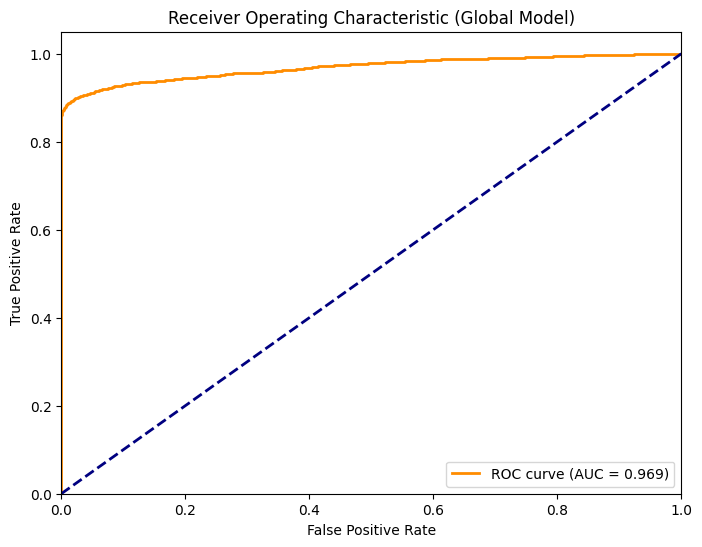


--- Round 2/5 ---
  [Client 1] Training locally...
  [Client 2] Training locally...
  [Client 3] Training locally...
  [Client 4] Training locally...
  [Client 5] Training locally...
  [Server] Aggregating weights (FedAvg)...
  > Global Model Accuracy on Test Set: 100.00%


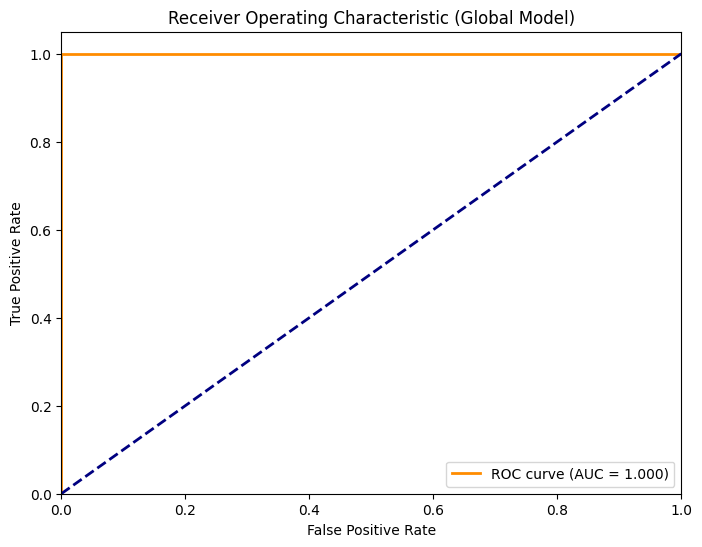


--- Round 3/5 ---
  [Client 1] Training locally...
  [Client 2] Training locally...
  [Client 3] Training locally...
  [Client 4] Training locally...
  [Client 5] Training locally...
  [Server] Aggregating weights (FedAvg)...
  > Global Model Accuracy on Test Set: 100.00%


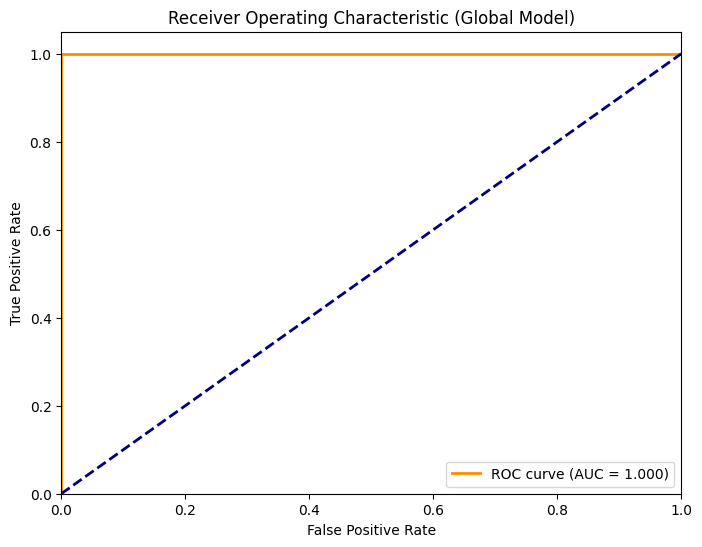


--- Round 4/5 ---
  [Client 1] Training locally...
  [Client 2] Training locally...
  [Client 3] Training locally...
  [Client 4] Training locally...
  [Client 5] Training locally...
  [Server] Aggregating weights (FedAvg)...
  > Global Model Accuracy on Test Set: 100.00%


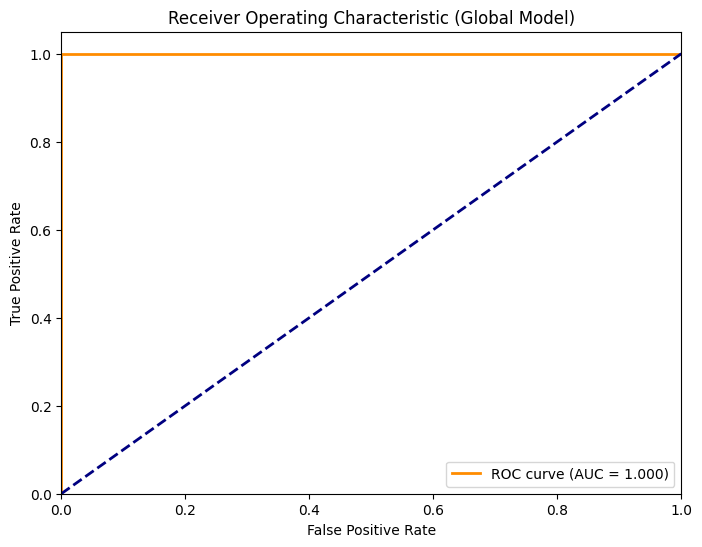


--- Round 5/5 ---
  [Client 1] Training locally...
  [Client 2] Training locally...
  [Client 3] Training locally...
  [Client 4] Training locally...
  [Client 5] Training locally...
  [Server] Aggregating weights (FedAvg)...
  > Global Model Accuracy on Test Set: 100.00%


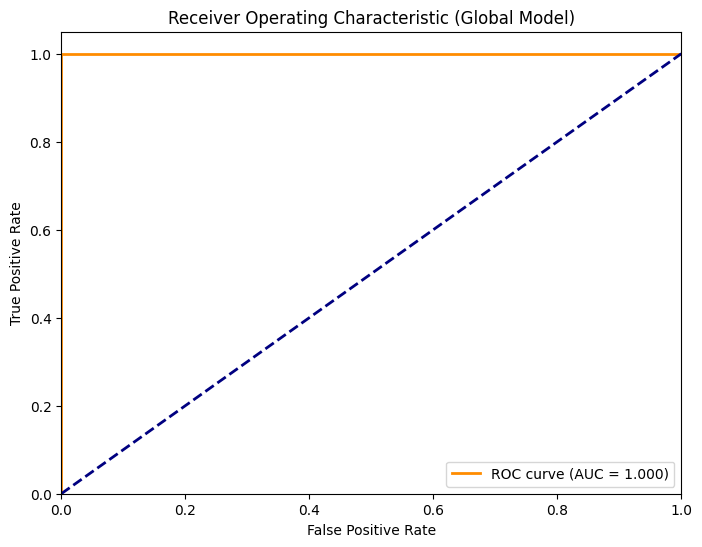


Federated Learning Complete. Saved to ./fed-mamba-scl-model-large


In [8]:
# --- 8. Main Orchestration Loop ---
def run_federated_scl():
    print("="*50)
    print("STARTING FEDERATED MAMBA SCL")
    print("="*50)
    
    if not os.path.exists('/kaggle/input/ssm-sqli/train_ssm.csv'):
        print("Error: train_ssm.csv not found.")
        return
        
    client_datasets, tokenizer = get_client_datasets('/kaggle/input/ssm-sqli/train_ssm.csv', NUM_CLIENTS)
    
    # Initialize Larger Global Model
    global_model = FedMambaSCL(vocab_size=len(tokenizer), num_context_features=NUM_CONTEXT_FEATURES).to(device)
    
    # --- Parameter Count Verification ---
    total_params = sum(p.numel() for p in global_model.parameters() if p.requires_grad)
    print(f"\n[INFO] Model Architecture Upscaled.")
    print(f"[INFO] Total Trainable Parameters: {total_params:,}")
    if total_params < 30000000:
        print("[WARNING] Parameter count is below 30M target.")
    else:
        print("[SUCCESS] Parameter count meets >30M target.")
    # ------------------------------------

    for round_num in range(ROUNDS):
        print(f"\n--- Round {round_num + 1}/{ROUNDS} ---")
        local_weights = []
        
        for i in range(NUM_CLIENTS):
            client_model = copy.deepcopy(global_model)
            loader = DataLoader(client_datasets[i], batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
            
            print(f"  [Client {i+1}] Training locally...")
            w_local = client_update(client_model, loader, LOCAL_EPOCHS)
            local_weights.append(w_local)
            
            del client_model
            torch.cuda.empty_cache()
            
        print("  [Server] Aggregating weights (FedAvg)...")
        global_model = server_aggregate(global_model, local_weights)
        evaluate_global(global_model, '/kaggle/input/ssm-sqli/test_ssm.csv')

    final_path = "./fed-mamba-scl-model-large"
    os.makedirs(final_path, exist_ok=True)
    torch.save(global_model.state_dict(), f"{final_path}/model_state_dict.pth")
    tokenizer.save_pretrained(final_path)
    print(f"\nFederated Learning Complete. Saved to {final_path}")

if __name__ == "__main__":
    run_federated_scl()